# k-Nearest Neighbors (k-NN) Classification with Scikit-Learn

This notebook demonstrates classification using the k-NN algorithm from scikit-learn on the Wine dataset.

## 1. Introduction
We will build, train, and evaluate a k-NN classifier to predict wine classes.

## 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 3. Load and Prepare Data

In [2]:
# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Train k-NN Model

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## 5. Evaluate Model

In [4]:
y_pred = knn.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


Confusion Matrix:
[[18  0  0]
 [ 0 18  3]
 [ 0  0 15]]


/Users/trongphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 6. Visualization of Decision Boundaries (Optional)
For high-dimensional data like Wine, decision boundaries are visualized on two principal components.

/Users/trongphan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


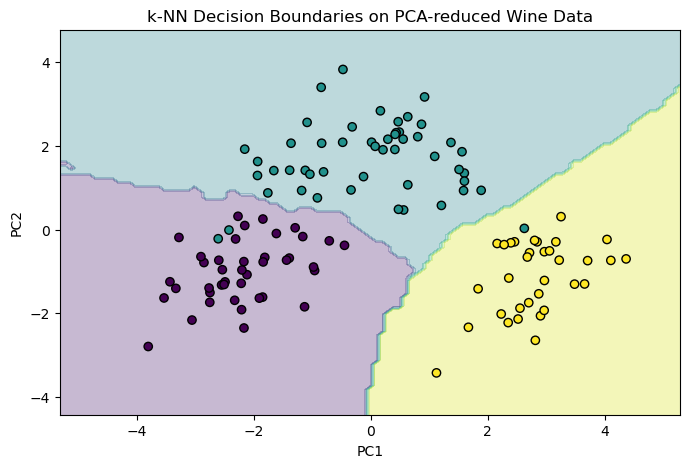

In [6]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scaler.transform(wine.data))

# Train k-NN on reduced data
knn_2d = KNeighborsClassifier(n_neighbors=5)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_reduced, wine.target, test_size=0.3, random_state=42, stratify=wine.target
)
knn_2d.fit(X_train_2d, y_train_2d)

# Plot decision surface
x_min, x_max = X_reduced[:,0].min()-1, X_reduced[:,0].max()+1
y_min, y_max = X_reduced[:,1].min()-1, X_reduced[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,5))
plt.contourf(xx, yy, Z, alpha=0.3)
scatter = plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train_2d, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k-NN Decision Boundaries on PCA-reduced Wine Data')
# plt.legend(handles=scatter.legend_elements()[0], labels=wine.target_names)
plt.show()

## 7. Conclusion
The k-NN classifier performs well on the Wine dataset. Adjust `n_neighbors` and distance metrics for optimization.